In [664]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import os
import sys
import statsmodels.formula.api as sm

In [665]:
emerg = pd.read_csv('../data/emerging.csv')
devel = pd.read_csv('../data/developed.csv')

In [666]:
emerg

,time,argentina,brazil,mexico,philippines,argentina_output,brazil_output,mexico_output,philippines_output
0,1980Q1,-,-,-,-,1.946159e+08,-,926115,-
1,1980Q2,-,-,-,-,2.083408e+08,-,937839,-
2,1980Q3,-,-,-,-,2.178563e+08,-,930147,-
3,1980Q4,-,-,-,-,2.147440e+08,-,997015,-
4,1981Q1,-,-,-,-,1.934521e+08,-,1002958,-
...,...,...,...,...,...,...,...,...,...
85,2001Q2,0.134948185714,11.9178320635,7.08091142857,9.28446984127,2.847958e+08,133.669009190938,1617266,240.954
86,2001Q3,0.180638516393,12.9300332787,6.72210213115,9.1088657377,2.631265e+08,134.368522434386,1553696,241.462
87,2001Q4,0.316251237635,12.1213366667,5.50285198925,7.77558037634,2.488646e+08,129.769769943688,1623693,272.801
88,2002Q1,0.49800936,9.78204283333,4.50024766667,6.08218716667,2.170674e+08,128.742504469439,-,NaN


In [667]:
devel

,time,australia,canada,netherlands,newzeland,australia_output,canada_output,netherlands_output,newzeland_output
0,1980Q1,10.52,14.38,-,15.73,80648,-,54912,-
1,1980Q2,13.65,12.98,-,14.14,81436,-,54064,-
2,1980Q3,12.30,10.72,-,13.50,82467,-,53898,-
3,1980Q4,11.65,14.53,-,14.10,84154,-,54916,-
4,1981Q1,13.53,17.13,-,14.72,83397,598955,54228,-
...,...,...,...,...,...,...,...,...,...
84,2001Q1,5.55,5.00,4.7,6.42,160231,1025741,91383,26201
85,2001Q2,4.91,4.45,4.55,5.86,161924,1026454,91660,26677
86,2001Q3,4.85,3.79,4.24,5.73,163740,1025210,91616,26857
87,2001Q4,4.30,2.23,3.41,4.96,165822,1032685,91506,27035


In [668]:
df = devel.merge(emerg, on='time', how='outer')
df[df == '-'] = np.nan
df

,time,australia,canada,netherlands,newzeland,australia_output,canada_output,netherlands_output,newzeland_output,argentina,brazil,mexico,philippines,argentina_output,brazil_output,mexico_output,philippines_output
0,1980Q1,10.52,14.38,NaN,15.73,80648,NaN,54912.0,NaN,NaN,NaN,NaN,NaN,1.946159e+08,NaN,926115,NaN
1,1980Q2,13.65,12.98,NaN,14.14,81436,NaN,54064.0,NaN,NaN,NaN,NaN,NaN,2.083408e+08,NaN,937839,NaN
2,1980Q3,12.30,10.72,NaN,13.50,82467,NaN,53898.0,NaN,NaN,NaN,NaN,NaN,2.178563e+08,NaN,930147,NaN
3,1980Q4,11.65,14.53,NaN,14.10,84154,NaN,54916.0,NaN,NaN,NaN,NaN,NaN,2.147440e+08,NaN,997015,NaN
4,1981Q1,13.53,17.13,NaN,14.72,83397,598955,54228.0,NaN,NaN,NaN,NaN,NaN,1.934521e+08,NaN,1002958,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2001Q2,4.91,4.45,4.55,5.86,161924,1026454,91660.0,26677,0.134948185714,11.9178320635,7.08091142857,9.28446984127,2.847958e+08,133.669009190938,1617266,240.954
86,2001Q3,4.85,3.79,4.24,5.73,163740,1025210,91616.0,26857,0.180638516393,12.9300332787,6.72210213115,9.1088657377,2.631265e+08,134.368522434386,1553696,241.462
87,2001Q4,4.30,2.23,3.41,4.96,165822,1032685,91506.0,27035,0.316251237635,12.1213366667,5.50285198925,7.77558037634,2.488646e+08,129.769769943688,1623693,272.801
88,2002Q1,4.34,2.20,3.32,NaN,NaN,1047731,91478.0,NaN,0.49800936,9.78204283333,4.50024766667,6.08218716667,2.170674e+08,128.742504469439,NaN,NaN


In [669]:
df = pd.melt(df, id_vars='time', var_name = 'country', value_name='value')
df['value'] = df['value'].astype(float)
df

,time,country,value
0,1980Q1,australia,10.520
1,1980Q2,australia,13.650
2,1980Q3,australia,12.300
3,1980Q4,australia,11.650
4,1981Q1,australia,13.530
...,...,...,...
1435,2001Q2,philippines_output,240.954
1436,2001Q3,philippines_output,241.462
1437,2001Q4,philippines_output,272.801
1438,2002Q1,philippines_output,NaN


In [670]:
isoutput = df.country.str.contains('output')
df['measure'] = ''
df.loc[isoutput, 'measure'] = 'output'
df.loc[~isoutput, 'measure'] = 'interestrate'
df['country'] = df['country'].str.replace('_output', '').astype(str)
#df = df.dropna(subset='value')
df

,time,country,value,measure
0,1980Q1,australia,10.520,interestrate
1,1980Q2,australia,13.650,interestrate
2,1980Q3,australia,12.300,interestrate
3,1980Q4,australia,11.650,interestrate
4,1981Q1,australia,13.530,interestrate
...,...,...,...,...
1435,2001Q2,philippines,240.954,output
1436,2001Q3,philippines,241.462,output
1437,2001Q4,philippines,272.801,output
1438,2002Q1,philippines,NaN,output


In [671]:
df = df.pivot(columns='measure', index=['time', 'country'], values='value').reset_index().sort_values(['country', 'time'])
df

measure,time,country,interestrate,output
0,1980Q1,argentina,NaN,1.946159e+08
8,1980Q2,argentina,NaN,2.083408e+08
16,1980Q3,argentina,NaN,2.178563e+08
24,1980Q4,argentina,NaN,2.147440e+08
32,1981Q1,argentina,NaN,1.934521e+08
...,...,...,...,...
687,2001Q2,philippines,9.284470,2.409540e+02
695,2001Q3,philippines,9.108866,2.414620e+02
703,2001Q4,philippines,7.775580,2.728010e+02
711,2002Q1,philippines,6.082187,NaN


In [672]:
df.country = df.country.str.title()
df.loc[df.country == 'Newzeland', 'country'] = 'New Zeland'

In [673]:
df.country.unique()

array(['Argentina', 'Australia', 'Brazil', 'Canada', 'Mexico',
       'Netherlands', 'New Zeland', 'Philippines'], dtype=object)

In [674]:
df.country_type = ''
emerging = ['Argentina', 'Brazil', 'Mexico', 'Philippines']
developed = ['Australia', 'Canada', 'Netherlands', 'New Zeland']
df.loc[df.country.isin(emerging), 'country_type'] = 'Emerging'
df.loc[df.country.isin(developed), 'country_type'] = 'Developed'

In [675]:
df['time'] = pd.to_datetime(df['time'])

/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_46703/4237337754.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'])


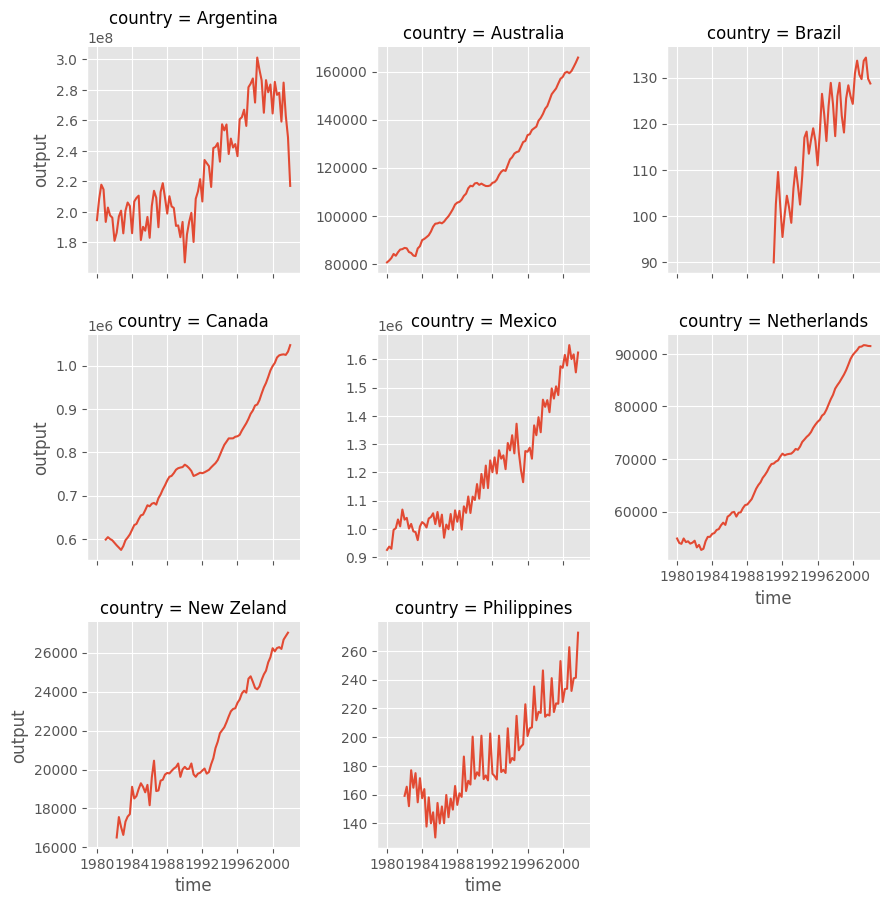

In [676]:
g = sns.FacetGrid(data=df, col='country', col_wrap=3, sharex=True, sharey=False)
g.map_dataframe(sns.lineplot, x='time', y='output')

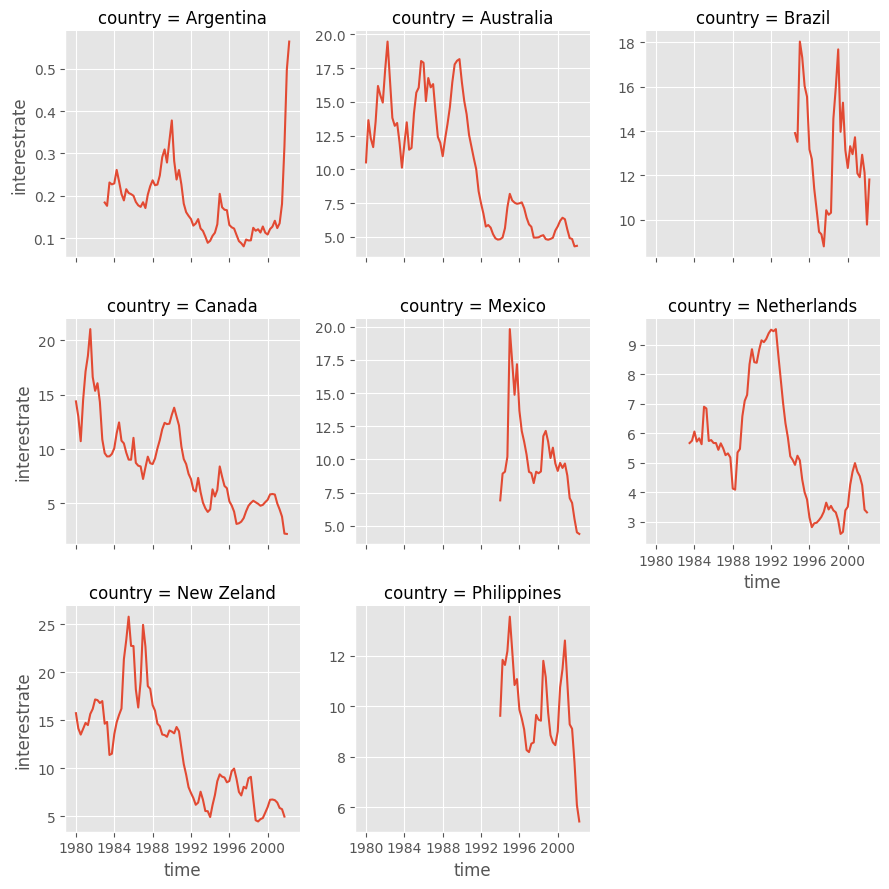

In [677]:
g = sns.FacetGrid(data=df, col='country', col_wrap=3, sharex=True, sharey=False)
g.map_dataframe(sns.lineplot, x='time', y='interestrate')

In [678]:
argentina = df.country == 'Argentina'
df.loc[argentina, 'interestrate'] = 100 * df.loc[argentina, 'interestrate']

In [679]:
from statsmodels.tsa.seasonal import seasonal_decompose
def get_seasonal(x):
    values = x.values
    trend_out = np.ones_like(values)
    isna = np.isnan(values)
    aux = seasonal_decompose(values[~isna], model='multiplicative', period=4)

    trend_out[isna] = np.nan
    trend_out[~isna] = aux.trend

    return trend_out
df['output_trend'] = df.groupby('country')['output'].transform(get_seasonal)

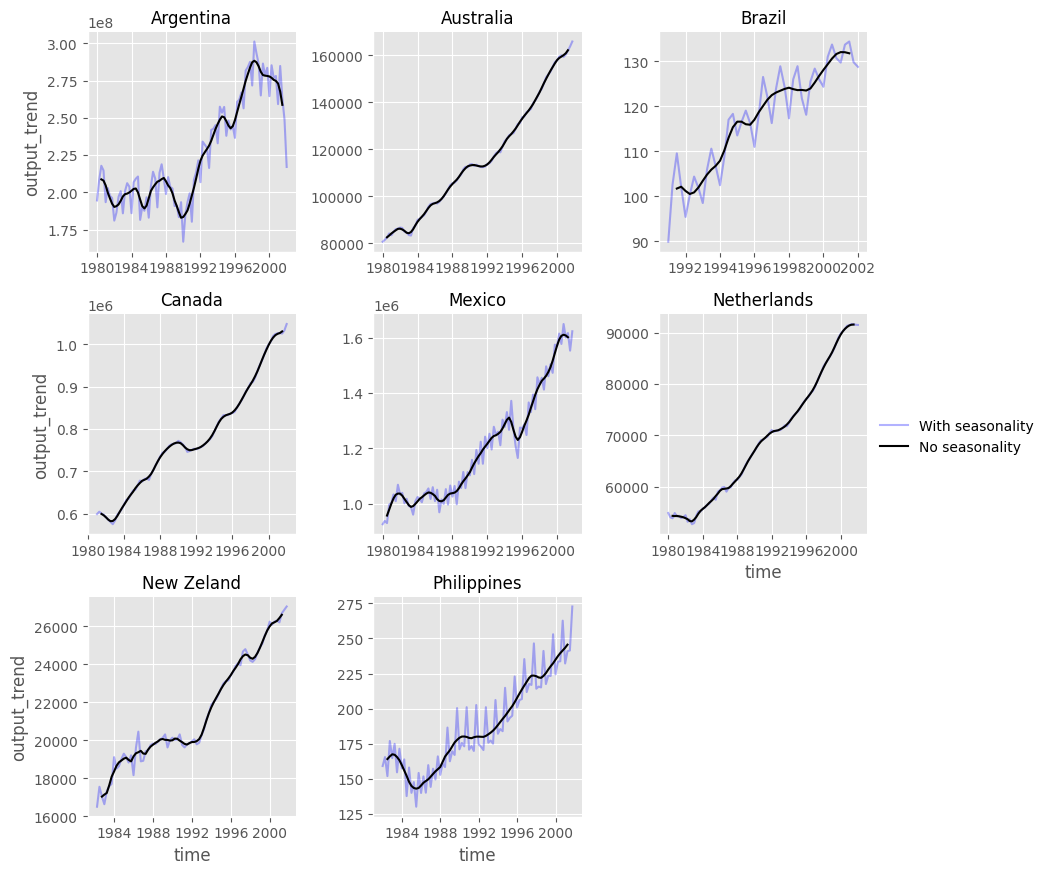

In [680]:
g = sns.FacetGrid(data=df, col='country', col_wrap=3, sharex=False, sharey=False)
g.map_dataframe(sns.lineplot, x='time', y='output', alpha=0.3, label='With seasonality', color='blue')
g.map_dataframe(sns.lineplot, x='time', y='output_trend', label='No seasonality', color='black')
g.set_titles('{col_name}')
g.add_legend()

In [681]:
swap_seasonal = ['Argentina', 'Brazil', 'Mexico', 'Philippines']
needs_seasonal = df.country.isin(swap_seasonal)
df.loc[needs_seasonal, 'output'] = df.loc[needs_seasonal, 'output_trend']
df.drop(columns='output_trend')

measure,time,country,interestrate,output,country_type
0,1980-01-01,Argentina,NaN,NaN,Emerging
8,1980-04-01,Argentina,NaN,NaN,Emerging
16,1980-07-01,Argentina,NaN,2.087438e+08,Emerging
24,1980-10-01,Argentina,NaN,2.079142e+08,Emerging
32,1981-01-01,Argentina,NaN,2.047101e+08,Emerging
...,...,...,...,...,...
687,2001-04-01,Philippines,9.284470,2.455980e+02,Emerging
695,2001-07-01,Philippines,9.108866,NaN,Emerging
703,2001-10-01,Philippines,7.775580,NaN,Emerging
711,2002-01-01,Philippines,6.082187,NaN,Emerging


In [682]:
df['L4interestrate'] = df.groupby('country')['interestrate'].shift(4)
df['dinterestrate'] = df['interestrate'] - df['L4interestrate']
df = df.drop(columns='L4interestrate')

In [683]:
from statsmodels.tsa.filters.hp_filter import hpfilter

def growth(x):
    values = x.values
    x_growth = np.ones_like(values)
    x_growth[:4] = np.nan
    x_growth[4:] = 100 * (values[4:] / values[:-4] - 1)
    return x_growth

def get_hp_cycle(x):
    values = x.values
    cycle_out = np.ones_like(values)
    isna = x.isna()
    cycle, _ = hpfilter(values[~isna], lamb=1600)
    cycle_out[isna] = np.nan
    cycle_out[~isna] = cycle
    return cycle_out


In [684]:
df['output_growth'] = df.groupby('country')['output'].transform(growth)
df['log_output'] = np.log(df.output)
df['output_cycle'] = 100*df.groupby('country')['log_output'].transform(get_hp_cycle)

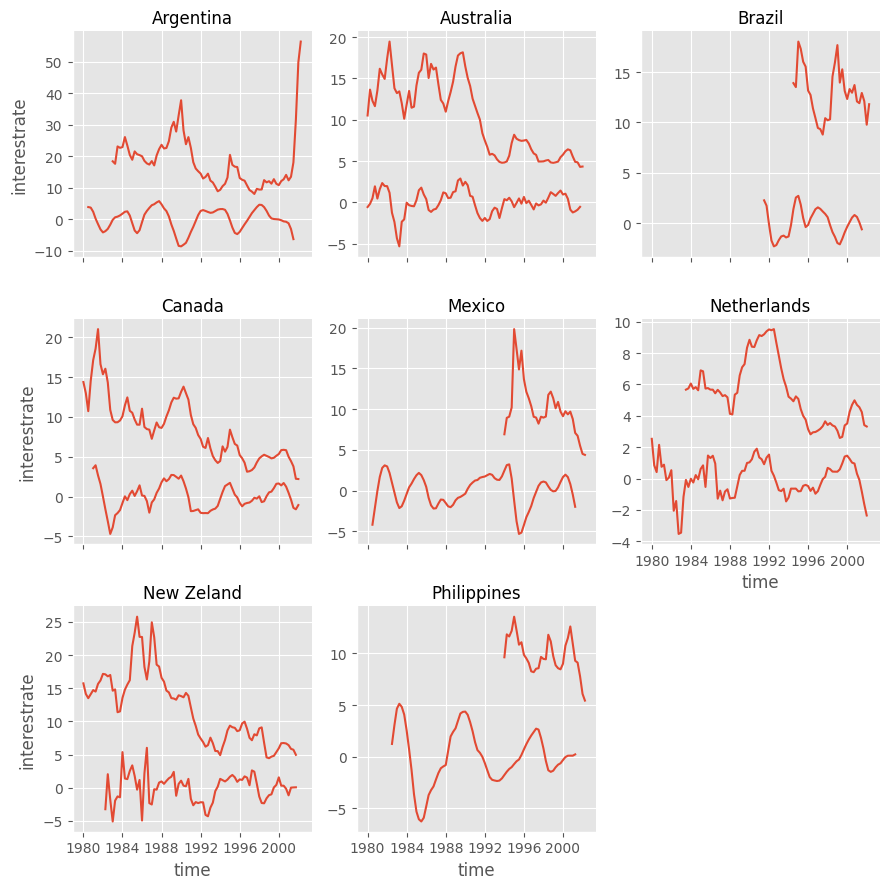

In [685]:
g = sns.FacetGrid(data=df, col='country', col_wrap=3, sharex=True, sharey=False)
g.map_dataframe(sns.lineplot, x='time', y='output_cycle')
g.map_dataframe(sns.lineplot, x='time', y='interestrate')
g.set_titles('{col_name}')

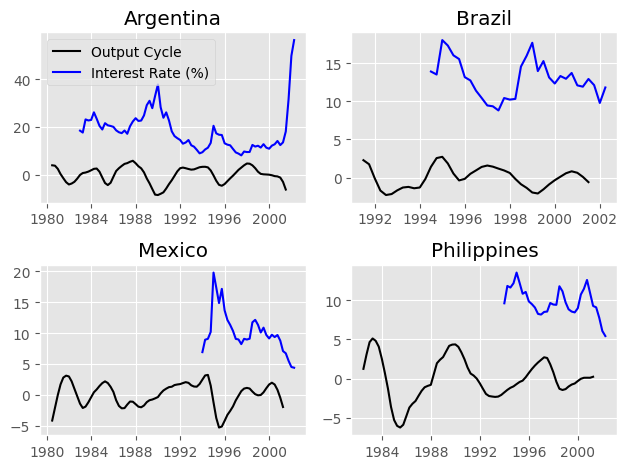

In [686]:
plt.subplot(221)
focus = df.query('country == "Argentina"')
plt.title('Argentina')
plt.plot(focus.time, focus.output_cycle, label='Output Cycle', color='black')
plt.plot(focus.time, focus.interestrate, label='Interest Rate (%)', color='blue')
plt.legend(loc='upper left')

plt.subplot(222)
focus = df.query('country == "Brazil"')
plt.title('Brazil')
plt.plot(focus.time, focus.output_cycle, label='Output Cycle', color='black')
plt.plot(focus.time, focus.interestrate, label='Interest Rate (%)', color='blue')

plt.subplot(223)
focus = df.query('country == "Mexico"')
plt.title('Mexico')
plt.plot(focus.time, focus.output_cycle, label='Output Cycle', color='black')
plt.plot(focus.time, focus.interestrate, label='Interest Rate (%)', color='blue')

plt.subplot(224)
focus = df.query('country == "Philippines"')
plt.title('Philippines')
plt.plot(focus.time, focus.output_cycle, label='Output Cycle', color='black')
plt.plot(focus.time, focus.interestrate, label='Interest Rate (%)', color='blue')

plt.tight_layout()

plt.savefig('../fig/output_cycle_interestrate_emerging.png', bbox_inches='tight', dpi=300)


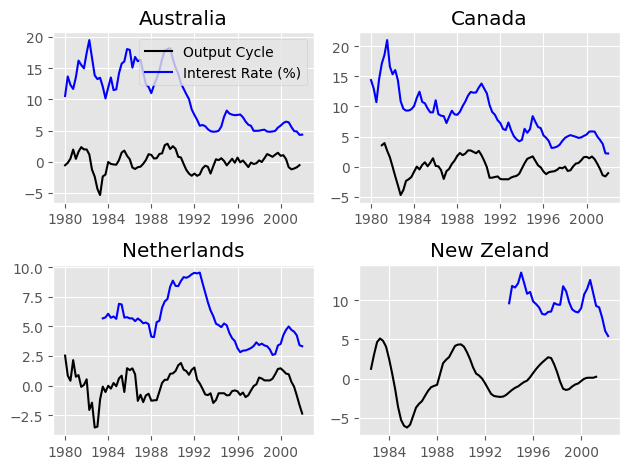

In [687]:
plt.subplot(221)
focus = df.query('country == "Australia"')
plt.title('Australia')
plt.plot(focus.time, focus.output_cycle, label='Output Cycle', color='black')
plt.plot(focus.time, focus.interestrate, label='Interest Rate (%)', color='blue')
plt.legend(loc='upper right')

plt.subplot(222)
focus = df.query('country == "Canada"')
plt.title('Canada')
plt.plot(focus.time, focus.output_cycle, label='Output Cycle', color='black')
plt.plot(focus.time, focus.interestrate, label='Interest Rate (%)', color='blue')

plt.subplot(223)
focus = df.query('country == "Netherlands"')
plt.title('Netherlands')
plt.plot(focus.time, focus.output_cycle, label='Output Cycle', color='black')
plt.plot(focus.time, focus.interestrate, label='Interest Rate (%)', color='blue')

plt.subplot(224)
focus = df.query('country == "Philippines"')
plt.title('New Zeland')
plt.plot(focus.time, focus.output_cycle, label='Output Cycle', color='black')
plt.plot(focus.time, focus.interestrate, label='Interest Rate (%)', color='blue')

plt.tight_layout()

plt.savefig('../fig/output_cycle_interestrate_developed.png', bbox_inches='tight', dpi=300)


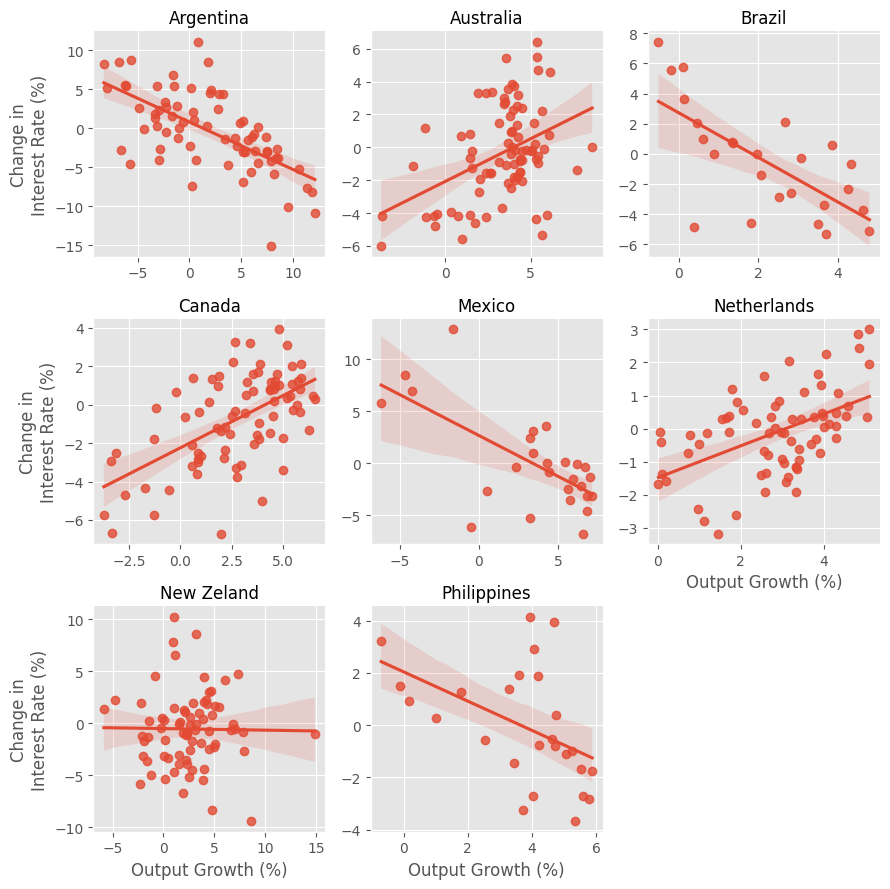

In [688]:
g = sns.FacetGrid(data=df, col='country', col_wrap=3, sharex=False, sharey=False)
g.map_dataframe(sns.regplot, x='output_growth', y='dinterestrate')
g.set_ylabels('Change in\nInterest Rate (%)')
g.set_xlabels('Output Growth (%)')
g.set_titles('{col_name}')
plt.tight_layout()
plt.savefig('../fig/output_growth_vs_interestrate.png', bbox_inches='tight', dpi=300)

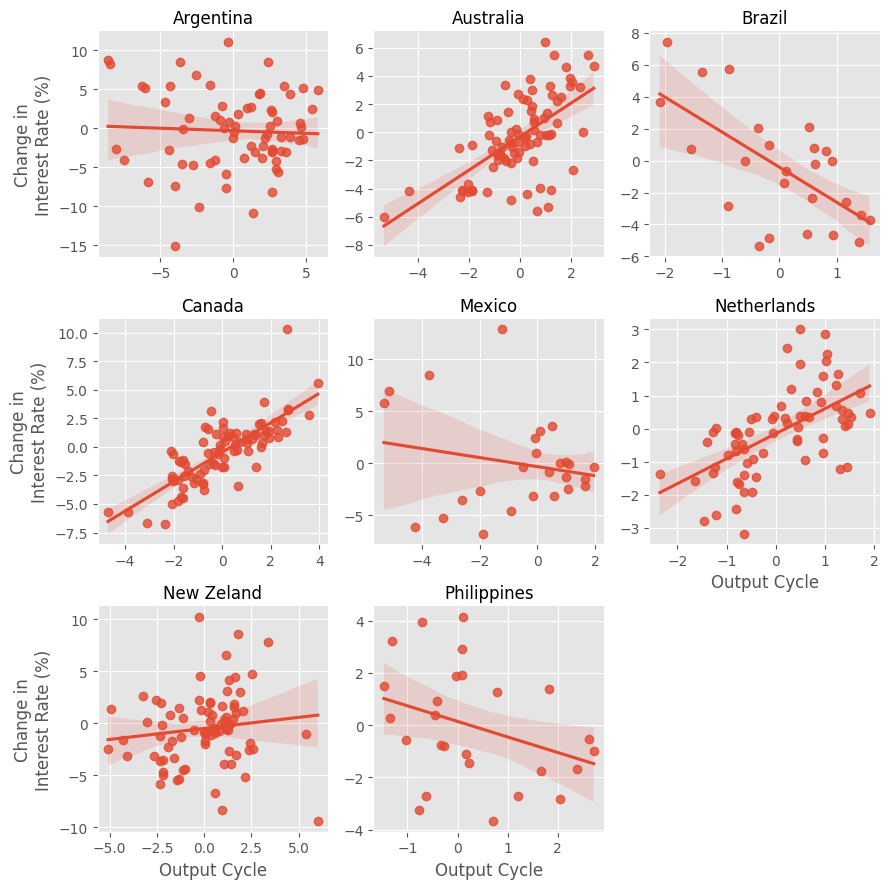

In [689]:
g = sns.FacetGrid(data=df, col='country', col_wrap=3, sharex=False, sharey=False)
g.map_dataframe(sns.regplot, x='output_cycle', y='dinterestrate')
g.set_ylabels('Change in\nInterest Rate (%)')
g.set_xlabels('Output Cycle')
g.set_titles('{col_name}')
plt.tight_layout()
plt.savefig('../fig/output_cycle_vs_interestrate.png', bbox_inches='tight', dpi=300)

In [690]:
df

measure,time,country,interestrate,output,country_type,output_trend,dinterestrate,output_growth,log_output,output_cycle
0,1980-01-01,Argentina,NaN,NaN,Emerging,NaN,NaN,NaN,NaN,NaN
8,1980-04-01,Argentina,NaN,NaN,Emerging,NaN,NaN,NaN,NaN,NaN
16,1980-07-01,Argentina,NaN,2.087438e+08,Emerging,2.087438e+08,NaN,NaN,19.156618,3.887837
24,1980-10-01,Argentina,NaN,2.079142e+08,Emerging,2.079142e+08,NaN,NaN,19.152636,3.719654
32,1981-01-01,Argentina,NaN,2.047101e+08,Emerging,2.047101e+08,NaN,NaN,19.137105,2.394152
...,...,...,...,...,...,...,...,...,...,...
687,2001-04-01,Philippines,9.284470,2.455980e+02,Emerging,2.455980e+02,-1.466575,3.449757,5.503696,0.223297
695,2001-07-01,Philippines,9.108866,NaN,Emerging,NaN,-2.368315,NaN,NaN,NaN
703,2001-10-01,Philippines,7.775580,NaN,Emerging,NaN,-4.834493,NaN,NaN,NaN
711,2002-01-01,Philippines,6.082187,NaN,Emerging,NaN,-4.853324,NaN,NaN,NaN


In [691]:
def to_tableau(x):
    return x.replace('_', ' ').title()
df_out = df.copy()

rename = {
    'interestrate':'interest rate', 
    'dinterestrate': 'change in interest rate'}
df_out = df_out.rename(columns=rename)
df_out.columns = [to_tableau(x) for x in df_out.columns]

In [692]:
df_out

,Time,Country,Interest Rate,Output,Country Type,Output Trend,Change In Interest Rate,Output Growth,Log Output,Output Cycle
0,1980-01-01,Argentina,NaN,NaN,Emerging,NaN,NaN,NaN,NaN,NaN
8,1980-04-01,Argentina,NaN,NaN,Emerging,NaN,NaN,NaN,NaN,NaN
16,1980-07-01,Argentina,NaN,2.087438e+08,Emerging,2.087438e+08,NaN,NaN,19.156618,3.887837
24,1980-10-01,Argentina,NaN,2.079142e+08,Emerging,2.079142e+08,NaN,NaN,19.152636,3.719654
32,1981-01-01,Argentina,NaN,2.047101e+08,Emerging,2.047101e+08,NaN,NaN,19.137105,2.394152
...,...,...,...,...,...,...,...,...,...,...
687,2001-04-01,Philippines,9.284470,2.455980e+02,Emerging,2.455980e+02,-1.466575,3.449757,5.503696,0.223297
695,2001-07-01,Philippines,9.108866,NaN,Emerging,NaN,-2.368315,NaN,NaN,NaN
703,2001-10-01,Philippines,7.775580,NaN,Emerging,NaN,-4.834493,NaN,NaN,NaN
711,2002-01-01,Philippines,6.082187,NaN,Emerging,NaN,-4.853324,NaN,NaN,NaN


In [693]:
df_out.to_csv('../data/tableau_data.csv', index=False)